<a href="https://colab.research.google.com/github/Clalloures/100daysofcode/blob/master/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importando Bibliotecas

In [2]:
import pandas as pd
import numpy as np
import missingno as msno
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

## Importando Data Set

In [4]:
data_importado = pd.read_csv("cleaned_timetracking_data.csv")
data_importado

,Tempo de Início,Tempo Final,Tempo Total em Minutos,Name,URL,BaseURL,Bundle Id,Type
0,"March 7, 2022 12:00 AM","March 7, 2022 12:00 AM",0,NaN,NaN,NaN,NaN,NaN
1,"March 7, 2022 8:30 PM","March 7, 2022 9:00 PM",30,Gravando vídeo tiktok,NaN,NaN,NaN,NaN
2,"March 6, 2022 11:00 AM","March 6, 2022 10:00 PM",660,Saída com os Amigos,NaN,NaN,NaN,Social
3,"March 7, 2022 12:00 AM","March 7, 2022 12:00 AM",0,Criação,NaN,NaN,NaN,NaN


In [12]:
data_importado.dtypes

Tempo de Início            object
Tempo Final                object
Tempo Total em Minutos      int64
Name                       object
URL                       float64
BaseURL                   float64
Bundle Id                 float64
Type                       object
dtype: object

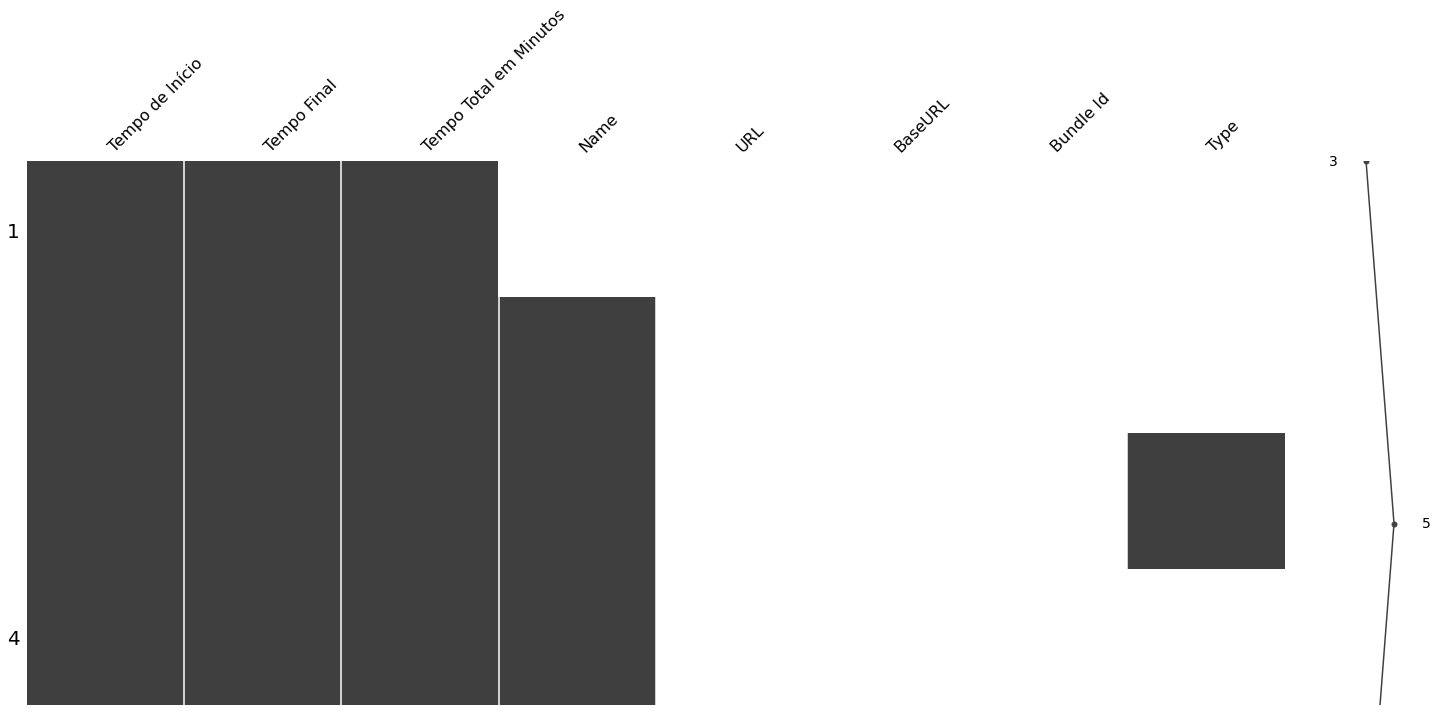

In [13]:
#####################################
# Valores faltantes
#####################################

msno.matrix(data_importado)

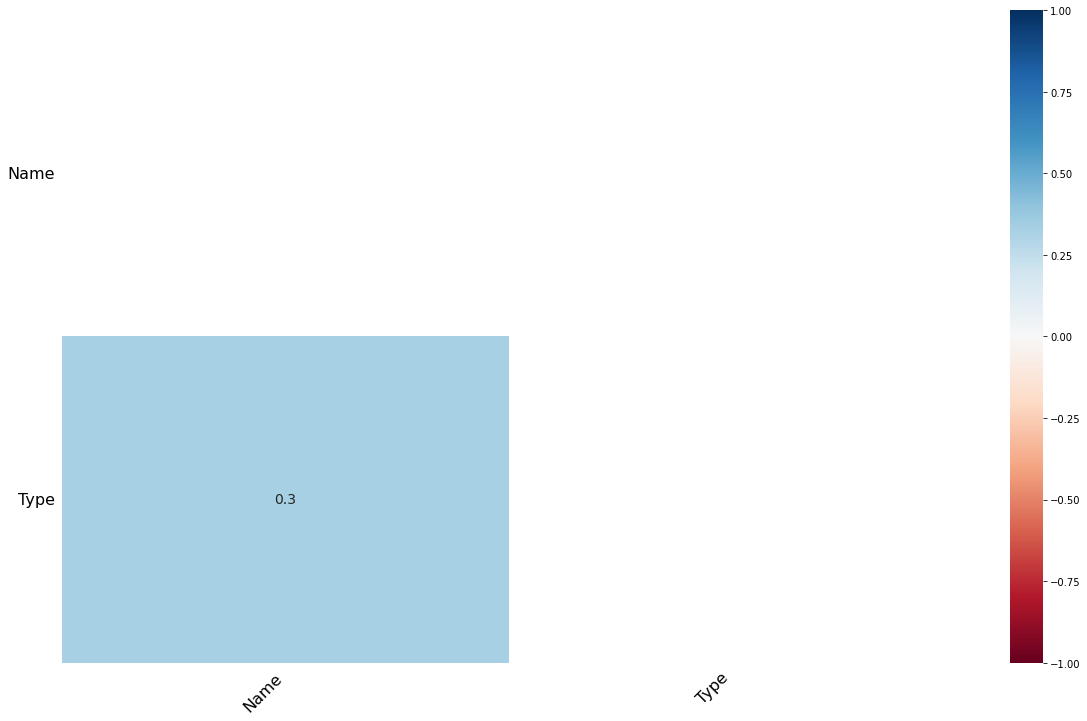

In [7]:
msno.heatmap(data_importado)

## Numerical Data Types

In [14]:
data_importado.describe()

,Tempo Total em Minutos,URL,BaseURL,Bundle Id
count,4.000000,0.0,0.0,0.0
mean,172.500000,NaN,NaN,NaN
std,325.307547,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN
25%,0.000000,NaN,NaN,NaN
50%,15.000000,NaN,NaN,NaN
75%,187.500000,NaN,NaN,NaN
max,660.000000,NaN,NaN,NaN


Se estiver em Segundos e quiser passar para Minutos:
data_importado.describe() / 60

In [16]:
data_importado.describe() / 60

,Tempo Total em Minutos,URL,BaseURL,Bundle Id
count,0.066667,0.0,0.0,0.0
mean,2.875000,NaN,NaN,NaN
std,5.421792,NaN,NaN,NaN
min,0.000000,NaN,NaN,NaN
25%,0.000000,NaN,NaN,NaN
50%,0.250000,NaN,NaN,NaN
75%,3.125000,NaN,NaN,NaN
max,11.000000,NaN,NaN,NaN


In [17]:
# Violin Plot of Data
px.violin(
    data_importado,
    x = "Tempo Total em Minutos",
    box = True,
    points = "all"
)

In [25]:
data_importado["Tempo de Início"] = data_importado[["Tempo de Início"]].apply(pd.to_datetime)

In [26]:
data_importado["Tempo Final"] = data_importado[["Tempo Final"]].apply(pd.to_datetime)

In [51]:
data_importado["Tempo Total"] = data_importado["Tempo Final"] - data_importado["Tempo de Início"]

In [52]:
data_importado["Tempo Total"]

0   0 days 00:00:00
1   0 days 00:30:00
2   0 days 11:00:00
3   0 days 00:00:00
Name: Tempo Total, dtype: timedelta64[ns]

In [34]:
data_importado[data_importado["Tempo Total"] ==  data_importado["Tempo Total"].max()]

,Tempo de Início,Tempo Final,Tempo Total em Minutos,Name,URL,BaseURL,Bundle Id,Type,Tempo Total
2,2022-03-06 11:00:00,2022-03-06 22:00:00,660,Saída com os Amigos,NaN,NaN,NaN,Social,0 days 11:00:00


In [37]:
px.histogram(
  data_importado,
  x = "Tempo Total",
  marginal = "violin",
  range_x = [0, data_importado["Tempo Total"].max()]
)

In [69]:
data_importado['Tempo Total em Minutes'] = data_importado['Tempo Total'].dt.components['minutes'] + (data_importado['Tempo Total'].dt.components['hours'] * 60)

In [70]:
data_importado['Tempo Total em Minutes']

0      0
1     30
2    660
3      0
Name: Tempo Total em Minutes, dtype: int64

In [72]:
bin_count = int((data_importado["Tempo Total em Minutes"].max()) / 30)

px.histogram(
  data_importado,
  x = "Tempo Total em Minutes",
  nbins = bin_count,
  marginal = "violin",
  range_x = [0, data_importado["Tempo Total em Minutes"].max()]
)

In [80]:
data_importado["Tempo Total Bins"] = pd.cut(
    data_importado["Tempo Total em Minutes"], bins= bin_count, include_lowest=False
)
data_importado

,Tempo de Início,Tempo Final,Tempo Total em Minutos,Name,URL,BaseURL,Bundle Id,Type,Tempo Total,Tempo Total em Minutes,Tempo Total Bins,Tempo Total Bins Lower
0,2022-03-07 00:00:00,2022-03-07 00:00:00,0,NaN,NaN,NaN,NaN,NaN,0 days 00:00:00,0,"(-0.66, 30.0]",0
1,2022-03-07 20:30:00,2022-03-07 21:00:00,30,Gravando vídeo tiktok,NaN,NaN,NaN,NaN,0 days 00:30:00,30,"(-0.66, 30.0]",0
2,2022-03-06 11:00:00,2022-03-06 22:00:00,660,Saída com os Amigos,NaN,NaN,NaN,Social,0 days 11:00:00,660,"(630.0, 660.0]",630
3,2022-03-07 00:00:00,2022-03-07 00:00:00,0,Criação,NaN,NaN,NaN,NaN,0 days 00:00:00,0,"(-0.66, 30.0]",0


In [ ]:
data_importado["Tempo Total Bins Lower"] = data_importado["Tempo Total Bins"].apply(
    lambda x: 0 if x.left < 0 else int(x.left)
)


histogram_data = (
    data_importado.groupby("Tempo Total Bins Lower")["Tempo Total Bins"].count().reset_index()
)

histogram_data["PercentualDeTempo"] =  histogram_data["Tempo Total Bins"].apply(
    lambda x:x / histogram_data["Tempo Total Bins"].sum() * 100
)

histogram_data

In [81]:
histogram_data

,Tempo Total Bins Lower,Tempo Total Bins,PercentualDeTempo
0,0,3,75.0
1,30,0,0.0
2,60,0,0.0
3,90,0,0.0
4,120,0,0.0
5,150,0,0.0
6,180,0,0.0
7,210,0,0.0
8,240,0,0.0
9,270,0,0.0
